Given a binary tree with **n** nodes, find the number of **pairs violating the BST property**.<br>
BST has the following properties:-
- Every node is greater than its left child and less than its right child.
- Every node is greater than the maximum value of in its left subtree and less than the minimum value in its right subtree.
- The maximum in the left sub-tree must be less than the minimum in the right subtree.

<br>

**Example 1:**
>**Input :** <br>
>n = 5<br>
>Input tree<br>
>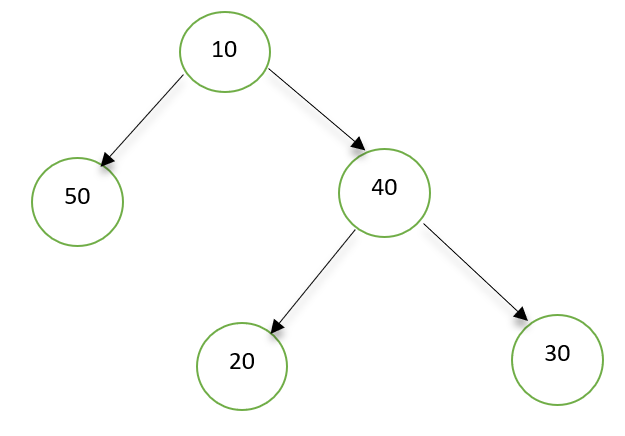<br>
>**Output :**<br>
>5<br>
>**Explanation :** <br>
>Pairs violating BST property are:-<br>
>(10,50), 10 should be greater than its left child value.<br>
>(40,30), 40 should be less than its right child value.<br>
>(50,20), (50,30) and (50,40), maximum of left subtree of 10 is 50 greater than 20, 30 and 40 of its right subtree.

**Example 2:**
>**Input :** <br>
>n = 6<br>
>Input tree<br>
>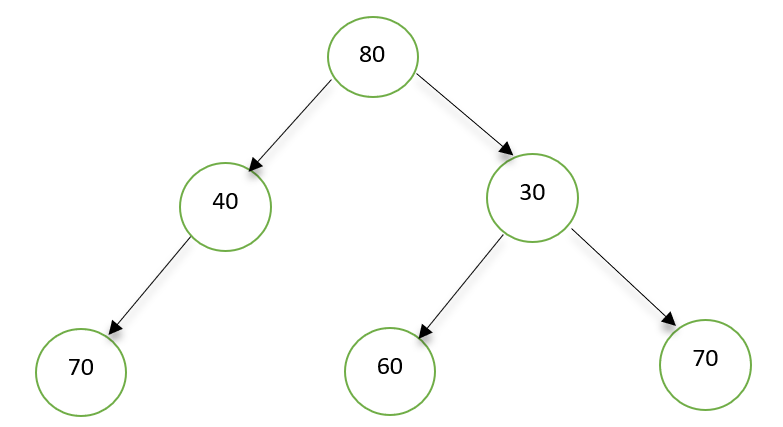<br>
>**Output :**<br>
>8<br>
>**Explanation :**<br>
>There are total 8 Pairs which violation the BST properties.

<br>

**Your task :**<br>
You don't have to read input or print anything. Your task is to complete the function **pairsViolatingBST()** that takes the root of the tree and **n** as input and returns number of pairs violating BST property.
 
**Expected Time Complexity:** O(n*logn)<br>
**Expected Space Complexity:** O(n)
 
**Your Task :**
- >1 <= n <= 2*10<sup>4</sup>
- >-10<sup>9</sup> <= node->data <= 10<sup>9</sup>

In [1]:
from collections import deque
from bisect import bisect_right
"""
definition of binary tree node.
class Node:
    def _init_(self,val):
        self.data = val
        self.left = None
        self.right = None
"""

class Solution:
    def pairsViolatingBST(self, n : int, root) -> int:
        # code here
        inorder = []

        def Inorder(root):
            if not root:
                return
            Inorder(root.left)
            inorder.append(root.data)
            Inorder(root.right)

        Inorder(root)
        if len(inorder) <= 1:
            return 0

        pq = []
        for i, val in enumerate(inorder):
            pq.append((val, i))
        pq.sort()

        ans = 0
        x = []
        while pq:
            val, i = pq.pop(0)
            cnt = bisect_right(x, i)
            ans += i - cnt
            x.insert(cnt, i)

        return ans